In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

pd.set_option('display.max_columns', None)

In [4]:
# lectura de archivo y lo convierte en un DF
df_alojamientos = pd.read_csv(r"C:\Users\Usuario\Desktop\Adalab Proyecto Airbnb\listings.csv")
df_alojamientos.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,136.0,3,45,2025-07-15,0.26,3,279,7,119-269-5808-01R
1,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43081,-155.88069,Entire home/apt,122.0,5,235,2025-08-21,1.24,2,225,11,TA-163-133-0304-01
2,5480,Isle Of You Naturally Farm Retreat,8145,Normand,Hawaii,Puna,19.44149,-154.91527,Private room,117.0,2,0,NaN,NaN,3,365,0,NaN
3,7896,"Maui Sunset Condo Beachfront Resort, Kihei/Wailea",21844,Caroline,Maui,Kihei-Makena,20.75684,-156.45631,Entire home/apt,150.0,4,96,2025-06-23,0.53,1,260,14,"390010020007, TA-169-914-3680-01"
4,13238,Studio On Princeville Golf Course / Paniolo Condo,51647,Annie/Greg,Kauai,North Shore Kauai,22.21844,-159.47090,Entire home/apt,149.0,3,193,2025-09-02,1.43,2,268,13,"540050030025, TA-095-127-9616-01"


In [5]:
df_alojamientos.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [6]:
# 1.1. ¿Cuántos alojamientos únicos contiene el dataset? (cuenta ID únicos, ignora los duplicados)
df_alojamientos['id'].nunique()

33457

In [7]:
# 1.2. ¿Qué tipos de alojamiento existen y cuál es el más común?
# Tipos
tipos_alojamientos = df_alojamientos['room_type'].unique()
tipos_alojamientos

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [8]:
# Alojamiento más común 

numero_alojamientos = df_alojamientos['room_type'].value_counts() # cuántas veces aparece cada tipo
numero_alojamientos

room_type
Entire home/apt    30551
Private room        2639
Hotel room           234
Shared room           33
Name: count, dtype: int64

In [9]:
# 1.3. ¿Cómo se distribuyen los alojamientos por barrio o zona?

alojamientos_barrio = df_alojamientos['neighbourhood'].value_counts()
alojamientos_barrio


neighbourhood
Primary Urban Center     6711
Lahaina                  5254
Kihei-Makena             4459
North Kona               3721
North Shore Kauai        2329
South Kohala             1942
Koloa-Poipu              1654
Puna                     1206
Kapaa-Wailua              847
Ewa                       827
Lihue                     771
Koolauloa                 581
South Hilo                553
Koolaupoko                409
North Shore Oahu          311
Waianae                   310
South Kona                263
Paia-Haiku                202
Molokai                   185
Kau                       183
East Honolulu             174
Wailuku-Kahului           118
North Kohala              107
Hana                       79
North Hilo                 64
Hamakua                    62
Makawao-Pukalani-Kula      61
Central Oahu               44
Waimea-Kekaha              22
Lanai                       8
Name: count, dtype: int64

In [10]:
# 1.4. ¿Existen barrios con una concentración especialmente alta de alojamientos?

porcentaje_alojamiento_barrio = df_alojamientos['neighbourhood'].value_counts(normalize=True) * 100
porcentaje_alojamiento_barrio

neighbourhood
Primary Urban Center     20.058583
Lahaina                  15.703739
Kihei-Makena             13.327555
North Kona               11.121738
North Shore Kauai         6.961174
South Kohala              5.804465
Koloa-Poipu               4.943659
Puna                      3.604627
Kapaa-Wailua              2.531608
Ewa                       2.471830
Lihue                     2.304450
Koolauloa                 1.736557
South Hilo                1.652868
Koolaupoko                1.222465
North Shore Oahu          0.929551
Waianae                   0.926562
South Kona                0.786084
Paia-Haiku                0.603760
Molokai                   0.552949
Kau                       0.546971
East Honolulu             0.520071
Wailuku-Kahului           0.352692
North Kohala              0.319813
Hana                      0.236124
North Hilo                0.191290
Hamakua                   0.185312
Makawao-Pukalani-Kula     0.182324
Central Oahu              0.131512
Waimea

In [11]:
# 1.5. ¿Qué variables presentan valores nulos y en qué proporción?
# columnas
columnas_nulos = df_alojamientos.isnull().sum()
columnas_nulos

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              325
minimum_nights                       0
number_of_reviews                    0
last_review                       6726
reviews_per_month                 6726
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5770
dtype: int64

In [12]:
# proporción
proporcion_nulos = df_alojamientos.isnull().mean() * 100
proporcion_nulos

id                                 0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.005978
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.971396
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.103416
reviews_per_month                 20.103416
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
license                           17.246017
dtype: float64

In [13]:
# 1.6. ¿Hay columnas cuyo contenido no aporta valor al análisis y podrían eliminarse?
# neighbourhood_group, latitude, longitude, last_review, review_per_month

In [14]:
# 1.7. ¿Existen valores atípicos en el precio de los alojamientos? 

variables_numericas = df_alojamientos.select_dtypes(include='number').columns

# Outliers para 'price'

Q1 = df_alojamientos['price'].quantile(0.25)
Q3 = df_alojamientos['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_alojamientos[(df_alojamientos['price'] < Q1 - 1.5*IQR) | (df_alojamientos['price'] > Q3 + 1.5*IQR)]

print(len(outliers),"outliers")

3796 outliers


In [15]:
# ¿Cómo afectan a la media?

media = df_alojamientos['price'].mean()
mediana = df_alojamientos['price'].median()

print(media, "media")
print(mediana, "mediana")

print("Los outliers inflan la media, se ve afectada por los precios muy altos, mientras que la mediana no se ve afectada,\nmuestra mejor el precio tipico de los alojamieintos")

945.4945068212 media
233.0 mediana
Los outliers inflan la media, se ve afectada por los precios muy altos, mientras que la mediana no se ve afectada,
muestra mejor el precio tipico de los alojamieintos


In [16]:
# FASE 2

# nulos: host_name, price, last_review, reviews_per_month, license
df_alojamientos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33457 entries, 0 to 33456
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33457 non-null  int64  
 1   name                            33457 non-null  object 
 2   host_id                         33457 non-null  int64  
 3   host_name                       33455 non-null  object 
 4   neighbourhood_group             33457 non-null  object 
 5   neighbourhood                   33457 non-null  object 
 6   latitude                        33457 non-null  float64
 7   longitude                       33457 non-null  float64
 8   room_type                       33457 non-null  object 
 9   price                           33132 non-null  float64
 10  minimum_nights                  33457 non-null  int64  
 11  number_of_reviews               33457 non-null  int64  
 12  last_review                     

In [17]:
# nulos por columna

df_alojamientos.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              325
minimum_nights                       0
number_of_reviews                    0
last_review                       6726
reviews_per_month                 6726
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5770
dtype: int64

In [18]:
# Sustituyo los nulos por Unknown
df_alojamientos['host_name'] = df_alojamientos['host_name'].fillna('Unknown')

In [19]:
# eliminación de columnas
df_alojamientos = df_alojamientos.drop(columns=['last_review', 'reviews_per_month', 'latitude', 'longitude', 'neighbourhood_group'])

In [20]:
# eliminar filas nulas en Price
df_alojamientos = df_alojamientos.dropna(subset=['price'])

In [21]:
# compruebo los nulos (mantengo los nulos en license)
df_alojamientos.isnull().any()

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood                     False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
calculated_host_listings_count    False
availability_365                  False
number_of_reviews_ltm             False
license                            True
dtype: bool

In [22]:
# No hay filas duplicadas
df_alojamientos.duplicated().sum()

np.int64(0)

In [23]:
df_alojamientos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33132 entries, 0 to 33456
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33132 non-null  int64  
 1   name                            33132 non-null  object 
 2   host_id                         33132 non-null  int64  
 3   host_name                       33132 non-null  object 
 4   neighbourhood                   33132 non-null  object 
 5   room_type                       33132 non-null  object 
 6   price                           33132 non-null  float64
 7   minimum_nights                  33132 non-null  int64  
 8   number_of_reviews               33132 non-null  int64  
 9   calculated_host_listings_count  33132 non-null  int64  
 10  availability_365                33132 non-null  int64  
 11  number_of_reviews_ltm           33132 non-null  int64  
 12  license                         27394

In [24]:
# cambiar tipo de dato de columnas: id/host_id --> object 
# Convertir id y host_id a tipo object (categórico)

df_alojamientos['id'] = df_alojamientos['id'].astype(object)
df_alojamientos['host_id'] = df_alojamientos['host_id'].astype(object)


In [25]:
df_alojamientos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33132 entries, 0 to 33456
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33132 non-null  object 
 1   name                            33132 non-null  object 
 2   host_id                         33132 non-null  object 
 3   host_name                       33132 non-null  object 
 4   neighbourhood                   33132 non-null  object 
 5   room_type                       33132 non-null  object 
 6   price                           33132 non-null  float64
 7   minimum_nights                  33132 non-null  int64  
 8   number_of_reviews               33132 non-null  int64  
 9   calculated_host_listings_count  33132 non-null  int64  
 10  availability_365                33132 non-null  int64  
 11  number_of_reviews_ltm           33132 non-null  int64  
 12  license                         27394

In [26]:
# Limpieza simbolos o caracteres especiales

# Revisar los primeros valores de varias columnas
for i in ['price', 'minimum_nights', 'host_name', 'name', 'license']:
    print(i)
    print(df_alojamientos[i].head(10))
    print('---')

# price y minimum_nights está ok

price
0    136.0
1    122.0
2    117.0
3    150.0
4    149.0
5    275.0
6    279.0
7    124.0
8    165.0
9    311.0
Name: price, dtype: float64
---
minimum_nights
0    3
1    5
2    2
3    4
4    3
5    1
6    2
7    2
8    5
9    7
Name: minimum_nights, dtype: int64
---
host_name
0     Lea & Pat
1        Edward
2       Normand
3      Caroline
4    Annie/Greg
5          Lisa
6    Janet Lynn
7        Donald
8          Mary
9        Dennis
Name: host_name, dtype: object
---
name
0            Upcountry Hospitality in the 'Auwai Suite
1                  Hale Koa Studio & 1 Bedroom Units!!
2                   Isle Of You Naturally Farm Retreat
3    Maui Sunset Condo Beachfront Resort, Kihei/Wailea
4    Studio On Princeville Golf Course / Paniolo Condo
5                      2BR Pacific Shores by the Beach
6      Oceanfront Bali House w/ Hot tub @ Kehena Beach
7                  Luana Kai Oceanfront Condo by Owner
8       Very Close to Alii Drive and Magic Sands Beach
9    Ocean Front View C

In [27]:
# eliminamos espacios al inicio y unificar a minúsculas

columnas_categoricas = ['room_type', 'neighbourhood', 'host_name', 'license', 'name']

for i in columnas_categoricas:
    df_alojamientos[i] = df_alojamientos[i].str.strip().str.lower() 

In [33]:
# FASE 3
# 3.1.1 ¿Cuál es el precio medio y mediano de los alojamientos?

precio_medio = df_alojamientos["price"].mean()
precio_mediano = df_alojamientos["price"].median()

precio_medio, precio_mediano

(np.float64(945.4945068212), 233.0)

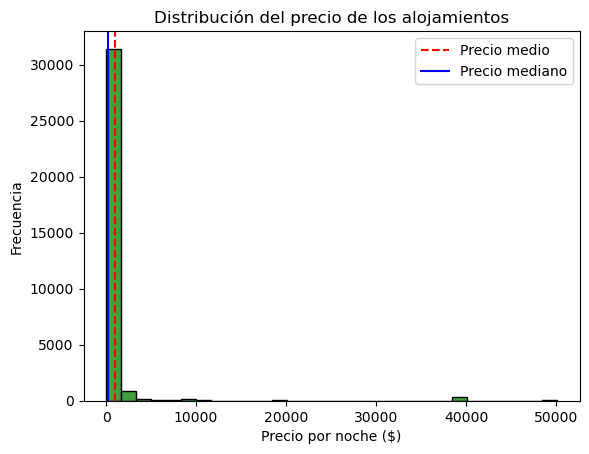

In [34]:
sns.histplot(x="price", data=df_alojamientos, bins=30, color="green")

plt.axvline(precio_medio, color="red", linestyle="--", label="Precio medio")
plt.axvline(precio_mediano, color="blue", linestyle="-", label="Precio mediano")

plt.xlabel("Precio por noche ($)")
plt.ylabel("Frecuencia")
plt.title("Distribución del precio de los alojamientos")
plt.legend()

plt.show()

# Los valores atípicos de precio no se han eliminado del análisis, 
# ya que pueden representar alojamientos de lujo. Por lo tanto, existen alojamientos con precios extremadamente alto que distorsionan la visualización

In [37]:
# 3.1.2 ¿Cómo varía el precio según el tipo de alojamiento?

precios_tipo_alojamiento = df_alojamientos.groupby("room_type")["price"].agg(["mean", "median"])
precios_tipo_alojamiento



,mean,median
room_type,,
entire home/apt,747.322246,234.0
hotel room,23000.952991,40000.0
private room,1280.020849,187.5
shared room,105.030303,54.0


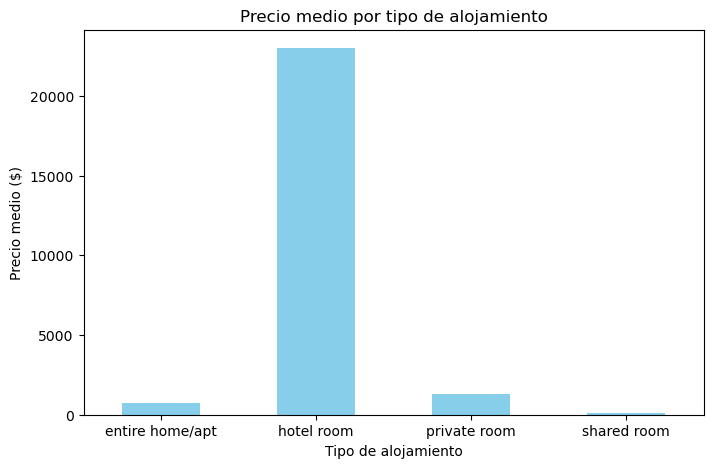

In [38]:

precios_tipo_alojamiento['mean'].plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title("Precio medio por tipo de alojamiento")
plt.ylabel("Precio medio ($)")
plt.xlabel("Tipo de alojamiento")
plt.xticks(rotation=0)
plt.show()


In [39]:
# 3.1.3 ¿Existen diferencias significativas de precio entre barrios?

precios_por_barrio = df_alojamientos.groupby("neighbourhood")["price"].agg(["mean", "median"])
print(precios_por_barrio)

                              mean  median
neighbourhood                             
central oahu            192.363636   159.0
east honolulu           489.936782   262.5
ewa                     493.771463   461.0
hamakua                 262.338710   123.5
hana                    308.303797   303.0
kapaa-wailua           1132.744379   251.0
kau                     152.781421   120.0
kihei-makena            470.273973   219.0
koloa-poipu             553.471230   383.0
koolauloa               430.096386   300.0
koolaupoko              485.885086   262.0
lahaina                1306.292865   375.5
lanai                   270.500000   273.0
lihue                   850.925490   286.0
makawao-pukalani-kula   298.622951   210.0
molokai                 130.291892   120.0
north hilo              323.578125   182.5
north kohala            377.682243   171.0
north kona             1146.739484   204.0
north shore kauai       606.871662   281.0
north shore oahu        368.993569   236.0
paia-haiku 

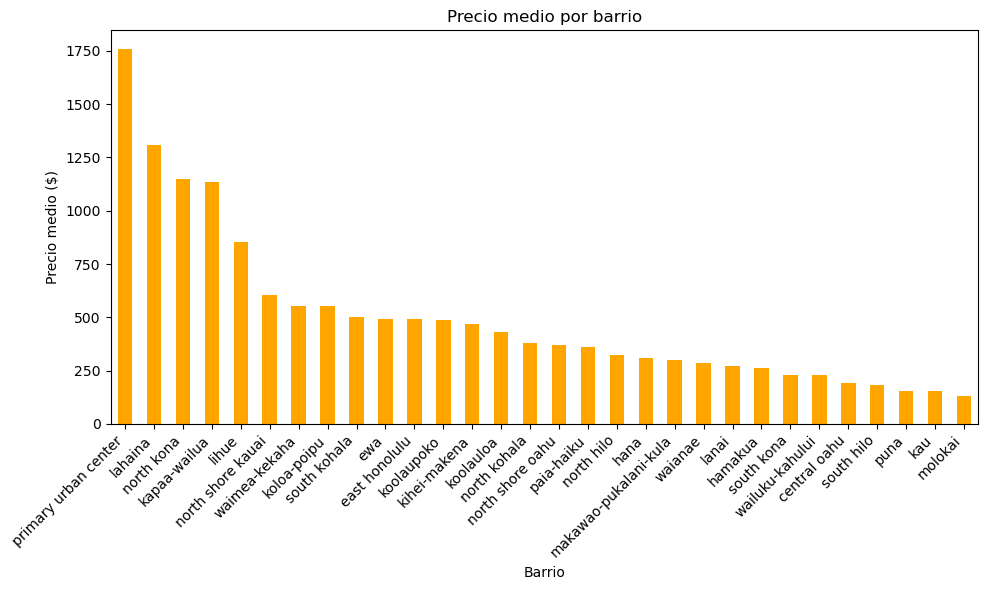

In [41]:
precios_por_barrio['mean'].sort_values(ascending=False).plot(
    kind='bar', color='orange', figsize=(10,6)
)
plt.title("Precio medio por barrio")
plt.ylabel("Precio medio ($)")
plt.xlabel("Barrio")
plt.xticks(rotation=45, ha='right')  #rotamos etiquetas para que no se pisen
plt.tight_layout()  # ajustamos margenes
plt.show()

In [42]:
# 3.1.4  ¿Qué barrios presentan los precios más altos y cuáles los más bajos?


precios_por_barrio = df_alojamientos.groupby("neighbourhood")["price"].mean()


mas_caros = precios_por_barrio.sort_values(ascending=False).head(3)
print("Barrios más caros:")
print(mas_caros)


mas_baratos = precios_por_barrio.sort_values(ascending=True).head(3)
print("\nBarrios más baratos:")
print(mas_baratos)

Barrios más caros:
neighbourhood
primary urban center    1758.253925
lahaina                 1306.292865
north kona              1146.739484
Name: price, dtype: float64

Barrios más baratos:
neighbourhood
molokai    130.291892
kau        152.781421
puna       153.990879
Name: price, dtype: float64


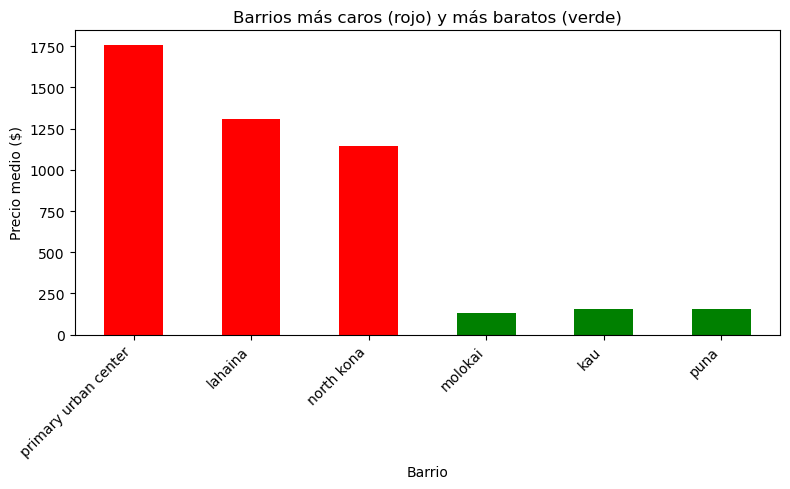

In [43]:

precios_top = pd.concat([mas_caros, mas_baratos])
precios_top.plot(kind='bar', color=['red','red','red','green','green','green'], figsize=(8,5))
plt.title("Barrios más caros (rojo) y más baratos (verde)")
plt.ylabel("Precio medio ($)")
plt.xlabel("Barrio")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [50]:
# 3.1.5  ¿Qué tipo de alojamiento ofrece la mejor relación entre precio y valoración?

# Relación precio/numero de reseñas por tipo de alojamiento
relacion = (df_alojamientos.groupby("room_type")["price"].mean() / 
            (df_alojamientos.groupby("room_type")["number_of_reviews"].mean() + 1))
print("Relación precio/numero de reseñas por tipo de alojamiento:")
print(relacion)


Relación precio/numero de reseñas por tipo de alojamiento:
room_type
entire home/apt      17.279111
hotel room         2933.091553
private room         28.792743
shared room           1.331029
dtype: float64


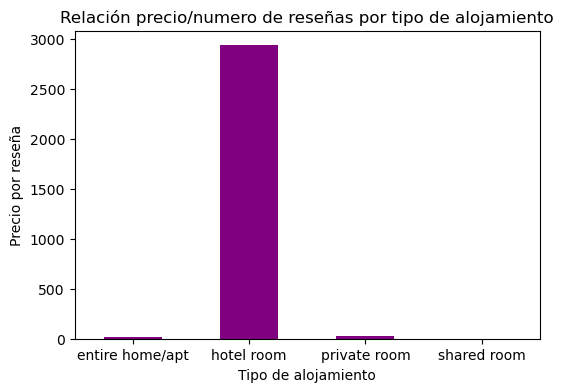

In [53]:

relacion.plot(kind='bar', color='purple', figsize=(6,4))
plt.title("Relación precio/numero de reseñas por tipo de alojamiento")
plt.ylabel("Precio por reseña")
plt.xlabel("Tipo de alojamiento")
plt.xticks(rotation=0)
plt.show()

In [48]:
# 3.1.6  ¿Existen alojamientos con precios extremadamente altos o bajos? ¿A qué podrían deberse?

print("Precio más alto:", df_alojamientos["price"].max())
print("Precio más bajo:", df_alojamientos["price"].min())

Precio más alto: 50123.0
Precio más bajo: 9.0


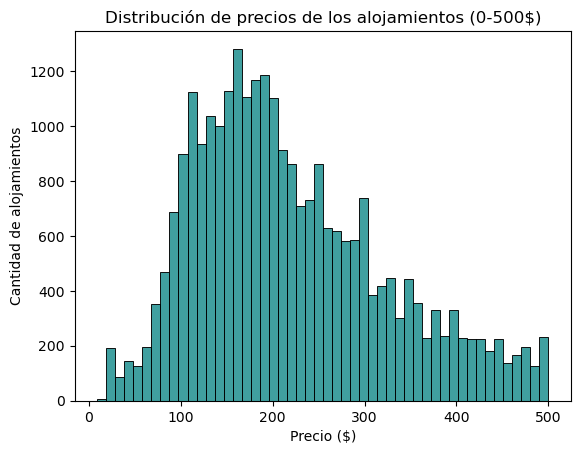

In [54]:

sns.histplot(df_alojamientos[df_alojamientos["price"] <= 500]["price"], bins=50, color="teal")
plt.title("Distribución de precios de los alojamientos (0-500$)")
plt.xlabel("Precio ($)")
plt.ylabel("Cantidad de alojamientos")
plt.show()

In [55]:
# 3.2.1  ¿Cuál es la valoración media de los alojamientos?

valoracion_media = df_alojamientos["number_of_reviews"].mean()
print("Número medio de reseñas por alojamiento (proxy de valoración):", round(valoracion_media, 2))

Número medio de reseñas por alojamiento (proxy de valoración): 42.13


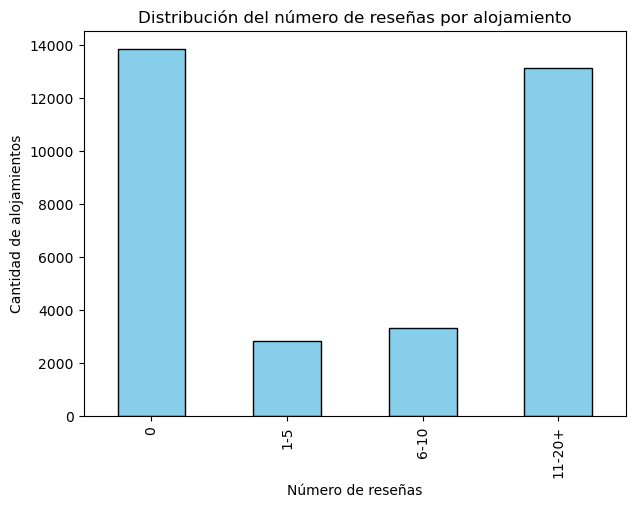

In [62]:

# Crear categorías de reseñas sin duplicar bordes
bins = [0, 5, 10, 20, df_alojamientos["number_of_reviews"].max()]
labels = ["0", "1-5", "6-10", "11-20+"]
df_alojamientos["reseñas_categoria"] = pd.cut(df_alojamientos["number_of_reviews"], bins=bins, labels=labels, include_lowest=True, duplicates='drop')

# Contar cantidad de alojamientos por categoría
conteo = df_alojamientos["reseñas_categoria"].value_counts().sort_index()

# Gráfico de barras
conteo.plot(kind="bar", color="skyblue", edgecolor="black", figsize=(7,5))
plt.title("Distribución del número de reseñas por alojamiento")
plt.xlabel("Número de reseñas")
plt.ylabel("Cantidad de alojamientos")
plt.show()

In [63]:
# 3.2.2 ¿Existen diferencias en las valoraciones según el tipo de alojamiento?

valoraciones_tipo = df_alojamientos.groupby("room_type")["number_of_reviews"].mean()
print("Número medio de reseñas por tipo de alojamiento:")
print(valoraciones_tipo)

Número medio de reseñas por tipo de alojamiento:
room_type
entire home/apt    42.250041
hotel room          6.841880
private room       43.456371
shared room        77.909091
Name: number_of_reviews, dtype: float64


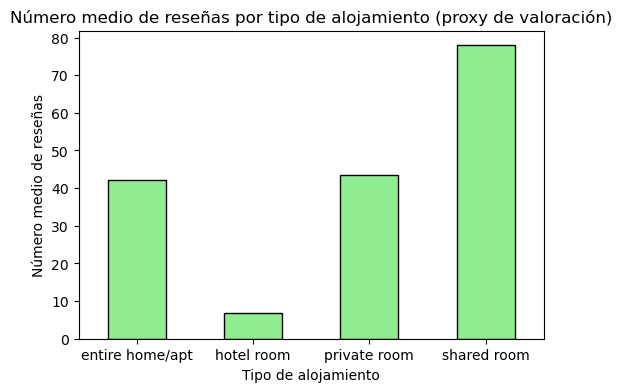

In [64]:

valoraciones_tipo.plot(kind='bar', color='lightgreen', edgecolor='black', figsize=(6,4))
plt.title("Número medio de reseñas por tipo de alojamiento (proxy de valoración)")
plt.ylabel("Número medio de reseñas")
plt.xlabel("Tipo de alojamiento")
plt.xticks(rotation=0)
plt.show()

In [65]:
# 3.2.3 ¿Los alojamientos con más reseñas tienen mejores valoraciones?

bins = [0, 5, 10, 20, 50, df_alojamientos["number_of_reviews"].max()]
labels = ["0-5","6-10","11-20","21-50","50+"]
df_alojamientos["reseñas_rango"] = pd.cut(df_alojamientos["number_of_reviews"], bins=bins, labels=labels, include_lowest=True, duplicates='drop')


conteo = df_alojamientos["reseñas_rango"].value_counts().sort_index()

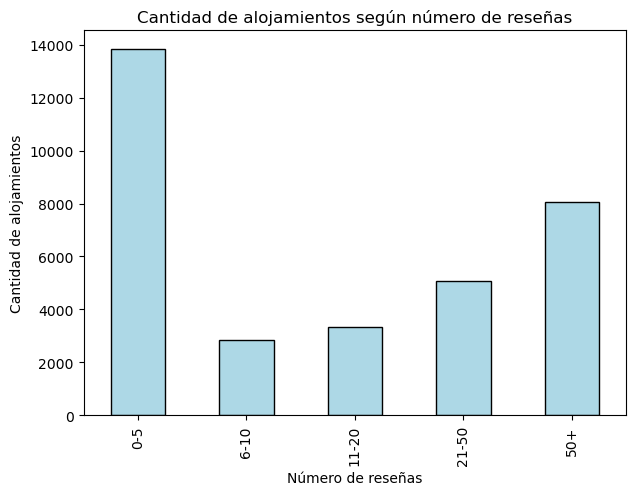

In [66]:

conteo.plot(kind="bar", color="lightblue", edgecolor="black", figsize=(7,5))
plt.title("Cantidad de alojamientos según número de reseñas")
plt.xlabel("Número de reseñas")
plt.ylabel("Cantidad de alojamientos")
plt.show()

In [67]:
# 3.2.4 ¿Qué barrios concentran los alojamientos mejor valorados?

# Número medio de reseñas por barrio (proxy de valoración)
valoracion_barrio = df_alojamientos.groupby("neighbourhood")["number_of_reviews"].mean().sort_values(ascending=False)
print("Número medio de reseñas por barrio:")
print(valoracion_barrio)

Número medio de reseñas por barrio:
neighbourhood
hana                     260.379747
lanai                    148.500000
waimea-kekaha            142.090909
paia-haiku               132.207921
hamakua                  126.919355
makawao-pukalani-kula    102.901639
puna                      94.275290
south kona                84.505703
kau                       82.661202
south hilo                75.667269
wailuku-kahului           74.542373
koolauloa                 67.819277
north hilo                66.484375
north kohala              50.401869
kihei-makena              48.200457
north kona                47.404071
north shore oahu          45.935691
primary urban center      45.595336
kapaa-wailua              43.003550
north shore kauai         42.484927
waianae                   40.097403
molokai                   35.281081
koolaupoko                31.987775
koloa-poipu               29.013931
east honolulu             23.614943
south kohala              22.298661
lahaina       

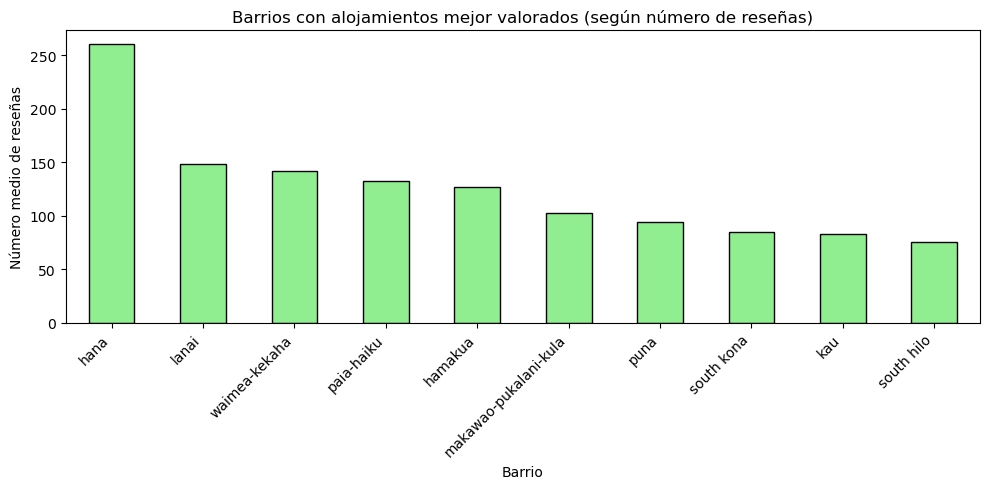

In [68]:

valoracion_barrio.head(10).plot(kind="bar", color="lightgreen", edgecolor="black", figsize=(10,5))
plt.title("Barrios con alojamientos mejor valorados (según número de reseñas)")
plt.ylabel("Número medio de reseñas")
plt.xlabel("Barrio")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6964\1751539932.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_reseñas = df_alojamientos.groupby("precio_rango")["number_of_reviews"].mean()


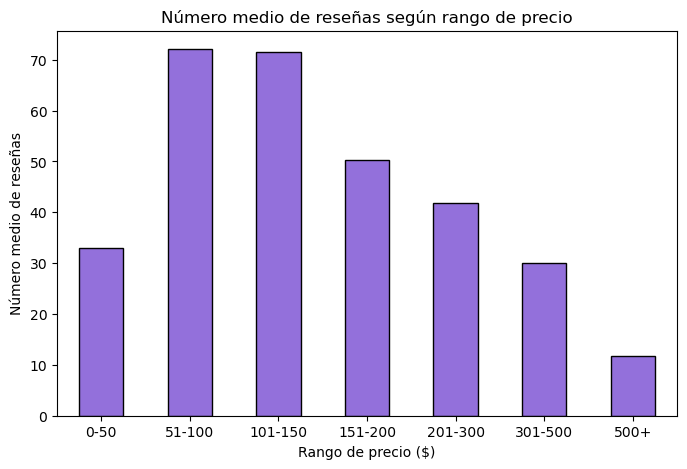

In [71]:
 # 3.2.5 ¿Se observa alguna relación entre precio y valoración?

# Crear rangos de precio
bins = [0, 50, 100, 150, 200, 300, 500, df_alojamientos["price"].max()]
labels = ["0-50","51-100","101-150","151-200","201-300","301-500","500+"]
df_alojamientos["precio_rango"] = pd.cut(df_alojamientos["price"], bins=bins, labels=labels, include_lowest=True)

# Número medio de reseñas por rango de precio
media_reseñas = df_alojamientos.groupby("precio_rango")["number_of_reviews"].mean()

# Gráfico de barras
media_reseñas.plot(kind="bar", color="mediumpurple", edgecolor="black", figsize=(8,5))
plt.title("Número medio de reseñas según rango de precio")
plt.xlabel("Rango de precio ($)")
plt.ylabel("Número medio de reseñas")
plt.xticks(rotation=0)
plt.show()


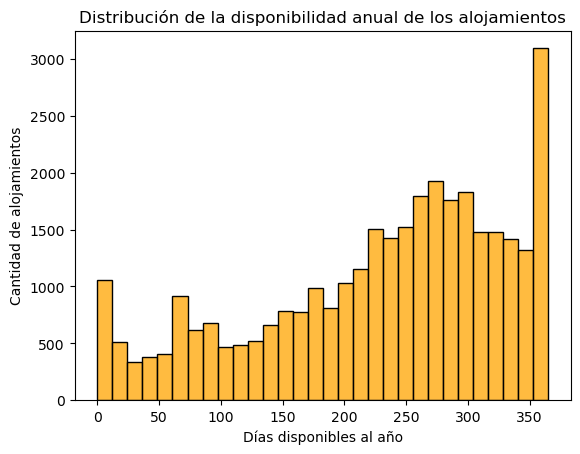

In [72]:
# 3.3.1  ¿Cómo se distribuye la disponibilidad anual de los alojamientos?

sns.histplot(df_alojamientos["availability_365"], bins=30, color="orange", edgecolor="black")
plt.title("Distribución de la disponibilidad anual de los alojamientos")
plt.xlabel("Días disponibles al año")
plt.ylabel("Cantidad de alojamientos")
plt.show()

In [73]:
# 3.3.2  ¿Existen barrios con mayor disponibilidad media?

# Disponibilidad media por barrio
disponibilidad_barrio = df_alojamientos.groupby("neighbourhood")["availability_365"].mean().sort_values(ascending=False)
print("Disponibilidad media por barrio:")
print(disponibilidad_barrio)

Disponibilidad media por barrio:
neighbourhood
wailuku-kahului          302.118644
lanai                    299.000000
molokai                  290.329730
makawao-pukalani-kula    285.393443
hamakua                  277.064516
kau                      269.939891
central oahu             262.863636
hana                     256.278481
waianae                  253.896104
east honolulu            253.568966
paia-haiku               252.237624
north hilo               252.203125
puna                     252.106965
south hilo               249.748644
north kohala             249.485981
north shore oahu         246.553055
koolauloa                245.294320
koolaupoko               240.220049
south kona               239.216730
south kohala             237.227600
kihei-makena             235.476027
lahaina                  231.174722
primary urban center     229.608444
kapaa-wailua             228.577515
koloa-poipu              224.027862
north shore kauai        220.764427
waimea-kekaha    

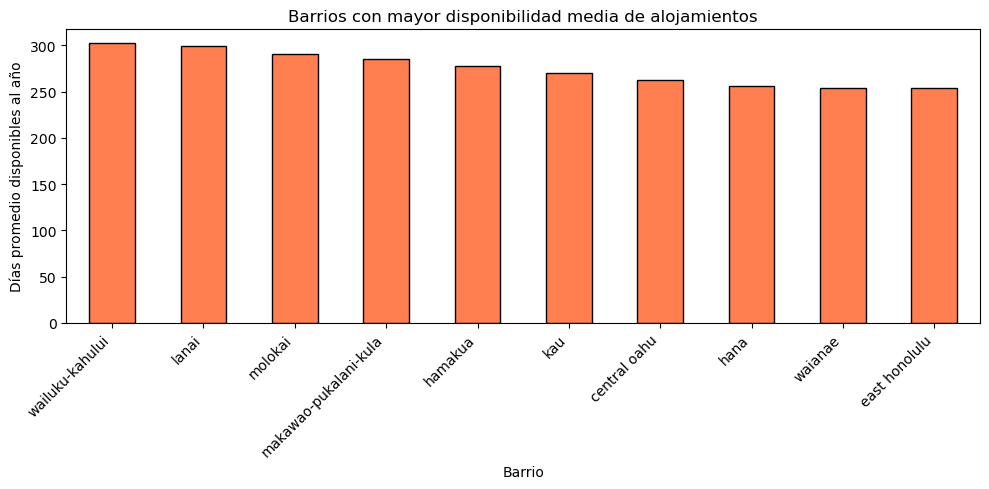

In [74]:
# Gráfico de barras de los 10 barrios con mayor disponibilidad
disponibilidad_barrio.head(10).plot(kind="bar", color="coral", edgecolor="black", figsize=(10,5))
plt.title("Barrios con mayor disponibilidad media de alojamientos")
plt.xlabel("Barrio")
plt.ylabel("Días promedio disponibles al año")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [75]:
# 3.3.3 ¿Qué tipo de alojamiento tiende a tener mayor disponibilidad?

# Disponibilidad media por tipo de alojamiento
disponibilidad_tipo = df_alojamientos.groupby("room_type")["availability_365"].mean()
print("Disponibilidad media por tipo de alojamiento:")
print(disponibilidad_tipo)

Disponibilidad media por tipo de alojamiento:
room_type
entire home/apt    230.556036
hotel room         249.089744
private room       217.423938
shared room        315.090909
Name: availability_365, dtype: float64


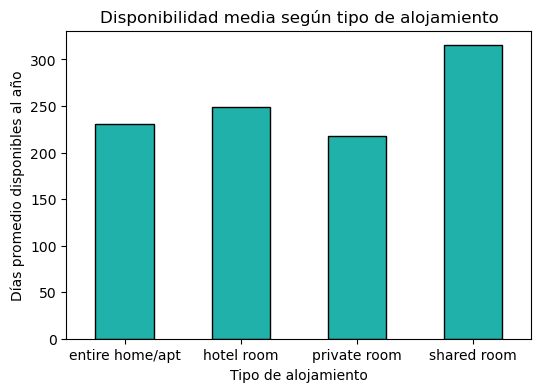

In [76]:

disponibilidad_tipo.plot(kind="bar", color="lightseagreen", edgecolor="black", figsize=(6,4))
plt.title("Disponibilidad media según tipo de alojamiento")
plt.xlabel("Tipo de alojamiento")
plt.ylabel("Días promedio disponibles al año")
plt.xticks(rotation=0)
plt.show()

In [77]:
# 3.3.4  ¿Puede la disponibilidad estar relacionada con el precio o la demanda?

# Crear rangos de disponibilidad
bins = [0, 30, 90, 180, 365]
labels = ["0-30","31-90","91-180","181-365"]
df_alojamientos["disponibilidad_rango"] = pd.cut(df_alojamientos["availability_365"], bins=bins, labels=labels, include_lowest=True)

# Precio medio por rango de disponibilidad
precio_medio_disp = df_alojamientos.groupby("disponibilidad_rango")["price"].mean()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6964\243408740.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precio_medio_disp = df_alojamientos.groupby("disponibilidad_rango")["price"].mean()


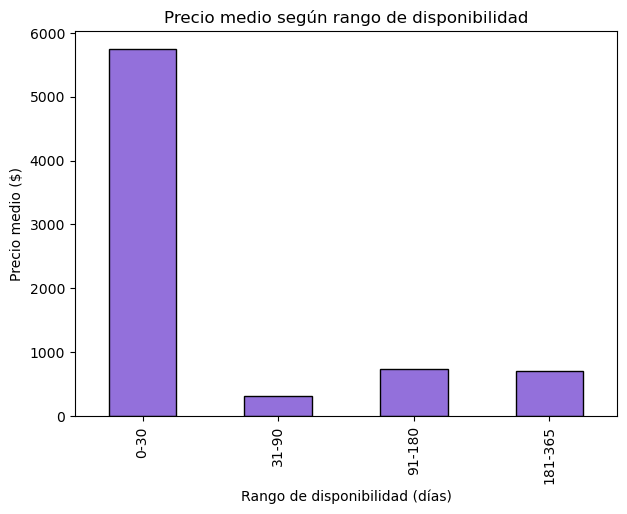

In [78]:

precio_medio_disp.plot(kind="bar", color="mediumpurple", edgecolor="black", figsize=(7,5))
plt.title("Precio medio según rango de disponibilidad")
plt.xlabel("Rango de disponibilidad (días)")
plt.ylabel("Precio medio ($)")
plt.show()

In [82]:

# Función para insertar un DataFrame en la base de datos
def insertar_datos(df, nombre_db, nombre_tabla):
    conn = sqlite3.connect(nombre_db)  # Crear/conectar la base de datos
    df.to_sql(nombre_tabla, conn, if_exists='replace', index=False)  # Insertar datos
    conn.close()  # Cerrar conexión
